In [1]:
from tqdm.notebook import tqdm
from PIL import Image
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os.path
import random
plt.rcParams["figure.figsize"] = (20, 10)

In [2]:
path = './train'
num_files = sum(os.path.isfile(os.path.join(path, f)) for f in os.listdir(path))
print(num_files)

2457


In [3]:
train_val_labels = pd.read_csv('./train/train.csv')

In [4]:
train_val_labels

,filename,center_x,center_y,size,label
0,571.jpeg,1746,691,138,1
1,387.jpeg,1132,649,100,0
2,813.jpeg,166,642,108,0
3,1351.jpeg,1693,753,104,1
4,1367.jpeg,1320,647,112,1
...,...,...,...,...,...
2451,379.jpeg,634,697,130,0
2452,648.jpeg,508,633,102,1
2453,1700.jpeg,534,636,64,0
2454,691.jpeg,937,685,150,0


In [5]:
bad = 0
bad_photos = []
for i in tqdm(range(num_files - 1)):
    img = cv2.imread('./train/' + str(i) +'.jpeg', 0)
    edges = cv2.Canny(img, 80, 200)
    if((edges == 0).sum() == edges.size):
        bad_photos.append(i)
        bad+=1
print('Процент плохих картинок ', round(bad/(num_files - 1) * 100, 2), ' %')


Процент плохих картинок  4.52  %


Text(0.5, 1.0, 'Original Image with edges')

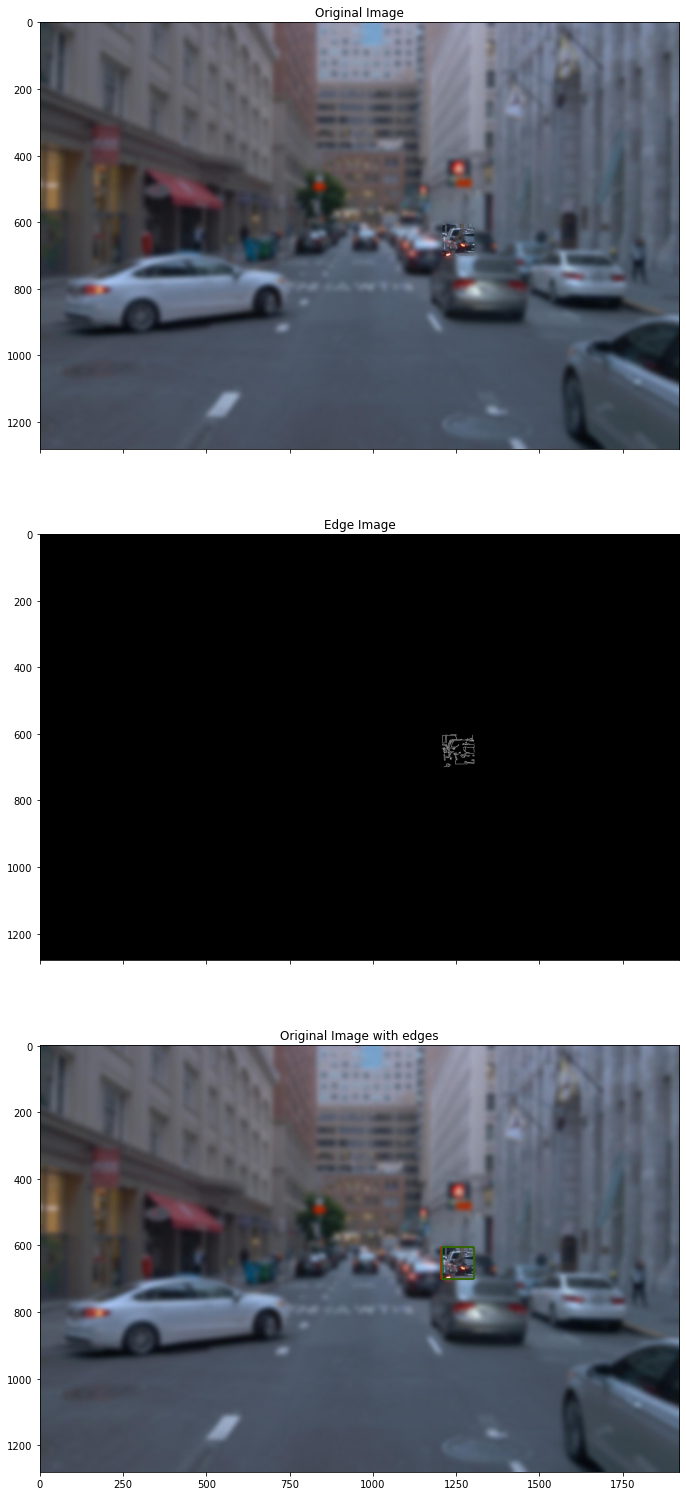

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(40, 40/1.5), \
                        sharey=True, sharex=True)
num_file = 50
assert num_file not in bad_photos

img = cv2.imread('./train/' + str(num_file) + '.jpeg', 0)
img_rgb = cv2.cvtColor(cv2.imread('./train/' + str(num_file) + '.jpeg'), cv2.COLOR_BGR2RGB)
edges = cv2.Canny(img, 80, 200)

x_center, y_center, size = train_val_labels[train_val_labels.filename==str(num_file) + '.jpeg'].iloc[:,1:-1].values[0][0], train_val_labels[train_val_labels.filename==str(num_file) + '.jpeg'].iloc[:,1:-1].values[0][1], train_val_labels[train_val_labels.filename==str(num_file) + '.jpeg'].iloc[:,1:-1].values[0][2]

ax[0].imshow(img_rgb)
ax[0].set_title('Original Image')
ax[1].imshow(edges,cmap='gray')
ax[1].set_title('Edge Image')
ax[2].imshow(img_rgb)
ax[2].hlines(np.nonzero(edges)[0].min(), np.nonzero(edges)[1].min(), np.nonzero(edges)[1].max(), colors='red')
ax[2].hlines(np.nonzero(edges)[0].max(), np.nonzero(edges)[1].min(), np.nonzero(edges)[1].max(), colors='red')
ax[2].vlines(np.nonzero(edges)[1].min(), np.nonzero(edges)[0].min(), np.nonzero(edges)[0].max(), colors='red')
ax[2].vlines(np.nonzero(edges)[1].max(), np.nonzero(edges)[0].min(), np.nonzero(edges)[0].max(), colors='red')
ax[2].hlines(y_center+size/2, x_center+size/2, x_center-size/2, colors='green')
ax[2].hlines(y_center-size/2, x_center+size/2, x_center-size/2, colors='green')
ax[2].vlines(x_center+size/2, y_center+size/2, y_center-size/2, colors='green')
ax[2].vlines(x_center-size/2, y_center+size/2, y_center-size/2, colors='green')
ax[2].set_title('Original Image with edges')

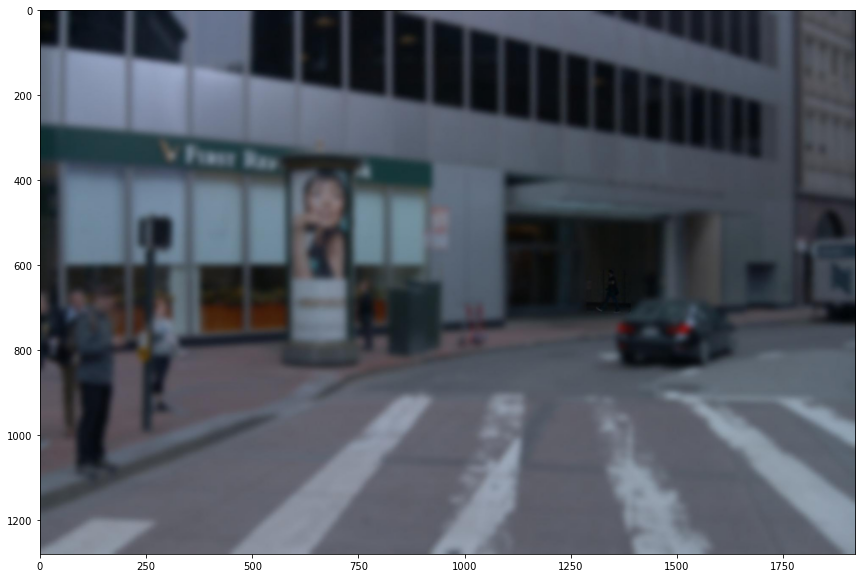

In [7]:
current_example = 1551 # random.choice(bad_photos)
plt.imshow(cv2.cvtColor(cv2.imread('./train/' + str(current_example) + '.jpeg'), cv2.COLOR_BGR2RGB))

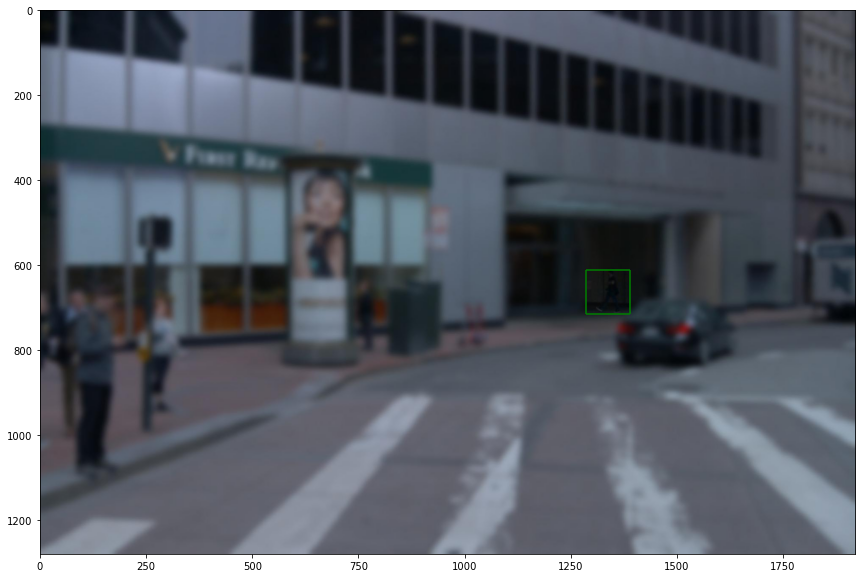

In [9]:
plt.imshow(cv2.cvtColor(cv2.imread('./train/' + str(current_example) + '.jpeg'), cv2.COLOR_BGR2RGB))
x_center_с, y_center_с, size_с = train_val_labels[train_val_labels.filename==str(current_example) + '.jpeg'].iloc[:,1:-1].values[0][0], train_val_labels[train_val_labels.filename==str(current_example) + '.jpeg'].iloc[:,1:-1].values[0][1], train_val_labels[train_val_labels.filename==str(current_example) + '.jpeg'].iloc[:,1:-1].values[0][2]
plt.hlines(y_center_с+size_с/2, x_center_с+size_с/2, x_center_с-size_с/2, colors='green')
plt.hlines(y_center_с-size_с/2, x_center_с+size_с/2, x_center_с-size_с/2, colors='green')
plt.vlines(x_center_с+size_с/2, y_center_с+size_с/2, y_center_с-size_с/2, colors='green')
plt.vlines(x_center_с-size_с/2, y_center_с+size_с/2, y_center_с-size_с/2, colors='green')

### Intersection over Union (IoU)

![title](https://www.pyimagesearch.com/wp-content/uploads/2016/09/iou_stop_sign.jpg)

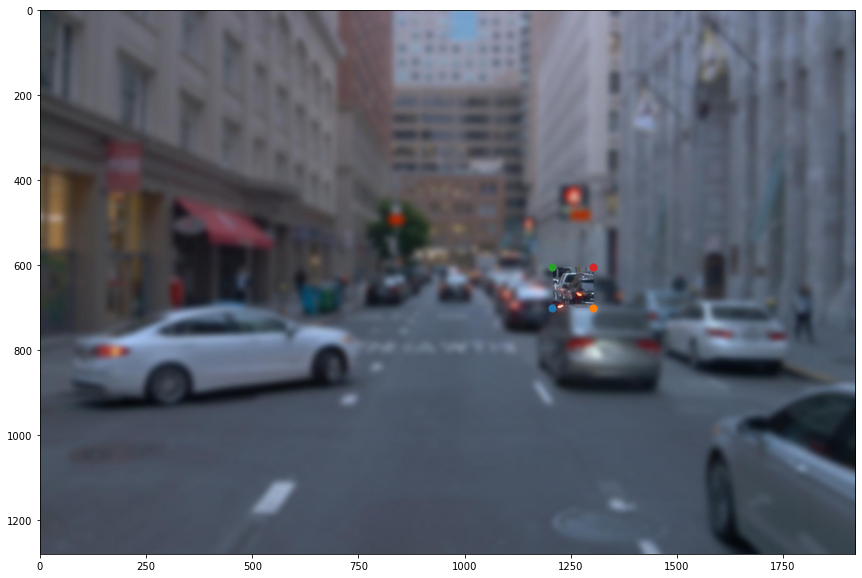

In [10]:
plt.imshow(img_rgb)
plt.scatter(np.nonzero(edges)[1].min(), np.nonzero(edges)[0].max(), s=50)
plt.scatter(np.nonzero(edges)[1].max(), np.nonzero(edges)[0].max(), s=50)
plt.scatter(np.nonzero(edges)[1].min(), np.nonzero(edges)[0].min(), s=50)
plt.scatter(np.nonzero(edges)[1].max(), np.nonzero(edges)[0].min(), s=50)

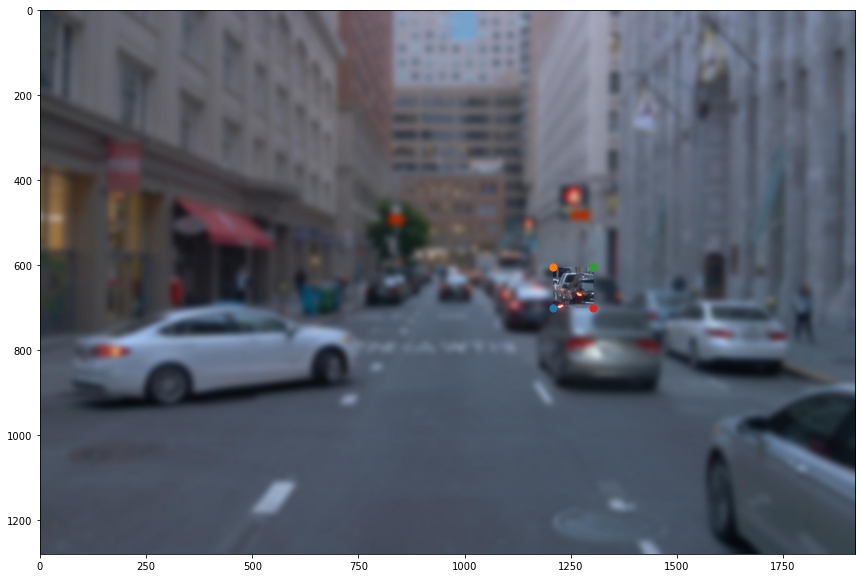

In [11]:
plt.imshow(img_rgb)
plt.scatter(x_center-size/2, y_center+size/2, s=50)
plt.scatter(x_center-size/2, y_center-size/2, s=50)
plt.scatter(x_center+size/2, y_center-size/2, s=50)
plt.scatter(x_center+size/2, y_center+size/2, s=50)

In [18]:
def create_slice(photo, x_left, x_right, y_low, y_high):
    if(x_left < 0):
        x_left = 0
    if(x_right > photo.shape[0]):
        x_right = photo.shape[0]
    if(y_low < 0):
        y_low = 0 
    if(y_high > photo.shape[1]):
        y_high = photo.shape[1]
    return photo[x_left:x_right, y_low:y_high]

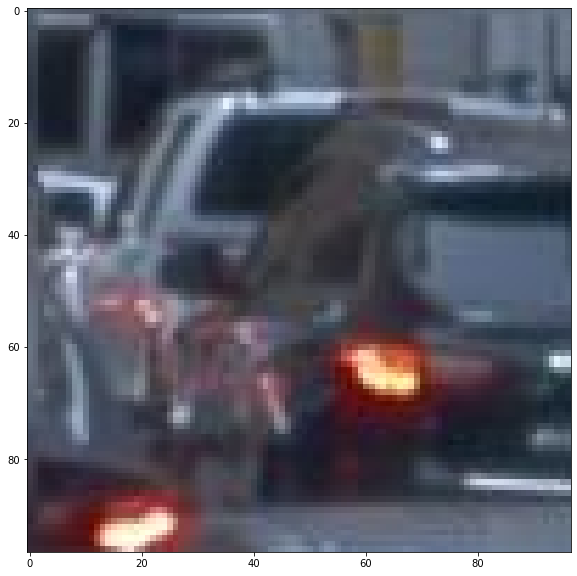

In [24]:
plt.imshow(create_slice(img_rgb, np.nonzero(edges)[0].min(), np.nonzero(edges)[0].max(), np.nonzero(edges)[1].min(), np.nonzero(edges)[1].max()))

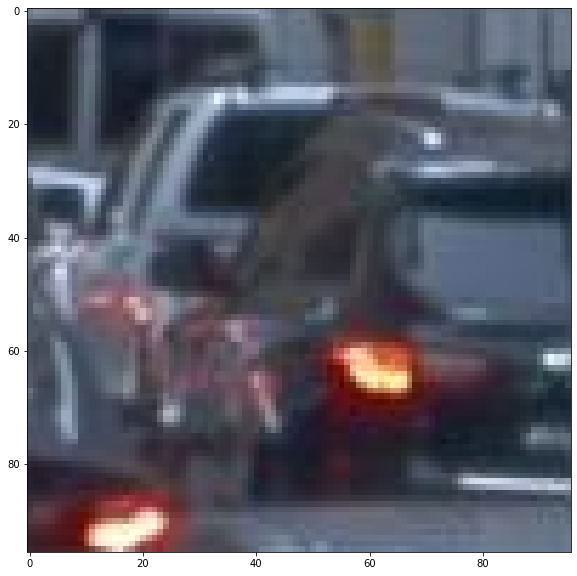

In [25]:
plt.imshow(create_slice(img_rgb, int(y_center-size/2), int(y_center+size/2), int(x_center-size/2), int(x_center+size/2)))

In [26]:
def create_new_photo(photo, x_left, x_right, y_low, y_high):
    if(x_left < 0):
        x_left = 0
    if(x_right > photo.shape[0]):
        x_right = photo.shape[0]
    if(y_low < 0):
        y_low = 0 
    if(y_high > photo.shape[1]):
        y_high = photo.shape[1]
    new_photo = np.zeros(photo.shape, dtype='int')
    new_photo[x_left:x_right, y_low:y_high] = np.full(photo[x_left:x_right, y_low:y_high].shape, 255)
    return new_photo

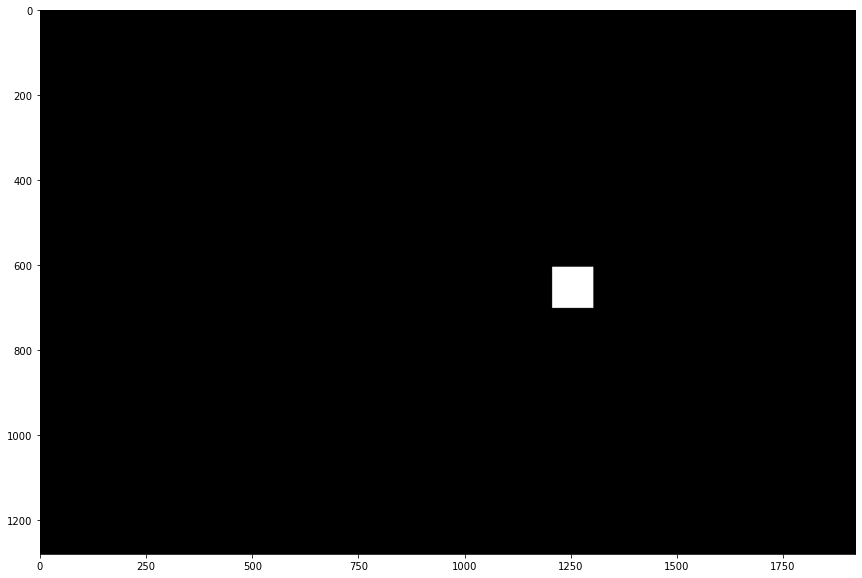

In [27]:
plt.imshow(create_new_photo(img_rgb, np.nonzero(edges)[0].min(), np.nonzero(edges)[0].max(), np.nonzero(edges)[1].min(), np.nonzero(edges)[1].max()))

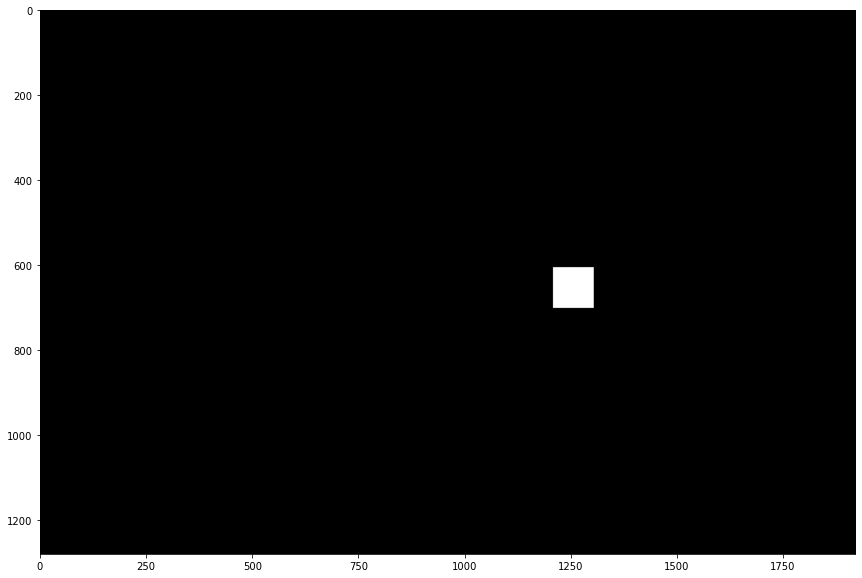

In [28]:
plt.imshow(create_new_photo(img_rgb, int(y_center-size/2), int(y_center+size/2), int(x_center-size/2), int(x_center+size/2)))

In [29]:
def iou(photo_pred, photo_real):
    SMOOTH = 1e-8
    intersection = (photo_pred & photo_real).sum()
    union = (photo_pred | photo_real).sum()
    iou = intersection / (union + SMOOTH)
    return iou

In [30]:
new_photo_predicted = create_new_photo(img_rgb, np.nonzero(edges)[0].min(), np.nonzero(edges)[0].max(), np.nonzero(edges)[1].min(), np.nonzero(edges)[1].max())
new_photo_real = create_new_photo(img_rgb, int(y_center-size/2), int(y_center+size/2), int(x_center-size/2), int(x_center+size/2))

In [31]:
iou(new_photo_predicted, new_photo_real)

0.9594950026301933

In [32]:
ious = []
bad_score = []
for num_file in tqdm(range(num_files - 1)):
    if(num_file not in bad_photos):
        img = cv2.imread('./train/' + str(num_file) + '.jpeg', 0)
        img_rgb = cv2.cvtColor(cv2.imread('./train/' + str(num_file) + '.jpeg'), cv2.COLOR_BGR2RGB)
        edges = cv2.Canny(img, 80, 200)
        x_center, y_center, size = train_val_labels[train_val_labels.filename==str(num_file) + '.jpeg'].iloc[:,1:-1].values[0][0], train_val_labels[train_val_labels.filename==str(num_file) + '.jpeg'].iloc[:,1:-1].values[0][1], train_val_labels[train_val_labels.filename==str(num_file) + '.jpeg'].iloc[:,1:-1].values[0][2]
        new_photo_predicted = create_new_photo(img_rgb, np.nonzero(edges)[0].min(), np.nonzero(edges)[0].max(), np.nonzero(edges)[1].min(), np.nonzero(edges)[1].max())
        new_photo_real = create_new_photo(img_rgb, int(y_center-size/2), int(y_center+size/2), int(x_center-size/2), int(x_center+size/2))
        if(iou(new_photo_predicted, new_photo_real) < 0.1):
            bad_score.append(num_file)
        else:
            ious.append(iou(new_photo_predicted, new_photo_real))

In [33]:
ious_s = pd.Series(ious)

In [34]:
ious_s.mean()

0.7821565120139427

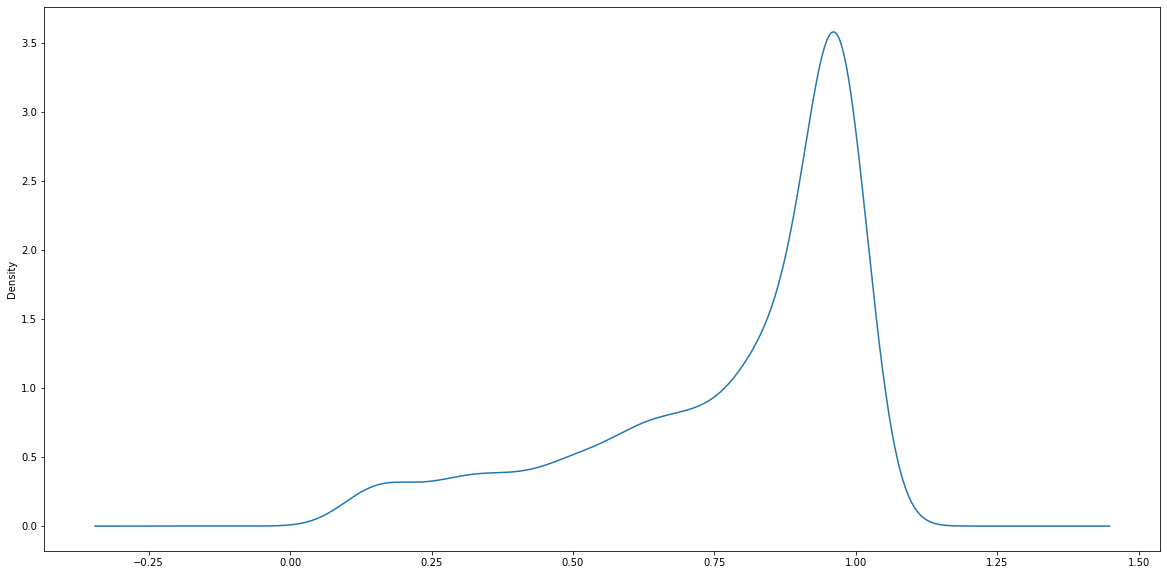

In [35]:
ious_s.plot.kde()

In [36]:
print('Процент плохого score: ', round(len(bad_score) * 100 / (num_files - 1 - len(bad_photos)), 2), ' %')

Процент плохого score:  5.33  %


In [37]:
bad_photos.extend(bad_score)

In [38]:
print('Итого не будет участвовать в train: ', round(len(bad_photos) * 100 / (num_files - 1), 2), ' %')

Итого не будет учавствовать в train:  9.61  %


In [39]:
path = "train_prepared"

try:
    os.mkdir(path)
except OSError:
    print ("Создать директорию %s не удалось" % path)
else:
    print ("Успешно создана директория %s " % path)

Успешно создана директория train_prepared 


In [40]:
path = "test_prepared"

try:
    os.mkdir(path)
except OSError:
    print ("Создать директорию %s не удалось" % path)
else:
    print ("Успешно создана директория %s " % path)

Успешно создана директория test_prepared 


In [42]:
width = []
height = []
for num_file in tqdm(range(num_files - 1)):
    if(num_file not in bad_photos):
        img = cv2.imread('./train/' + str(num_file) + '.jpeg', 0)
        img_rgb = cv2.cvtColor(cv2.imread('./train/' + str(num_file) + '.jpeg'), cv2.COLOR_BGR2RGB)
        edges = cv2.Canny(img, 80, 200)
        new_photo_predicted = create_slice(img_rgb, np.nonzero(edges)[0].min(), np.nonzero(edges)[0].max(), np.nonzero(edges)[1].min(), np.nonzero(edges)[1].max())
        Image.fromarray(new_photo_predicted).save('./train_prepared/' + str(num_file) + '.jpeg')
        width.append(new_photo_predicted.shape[1])
        height.append(new_photo_predicted.shape[0])

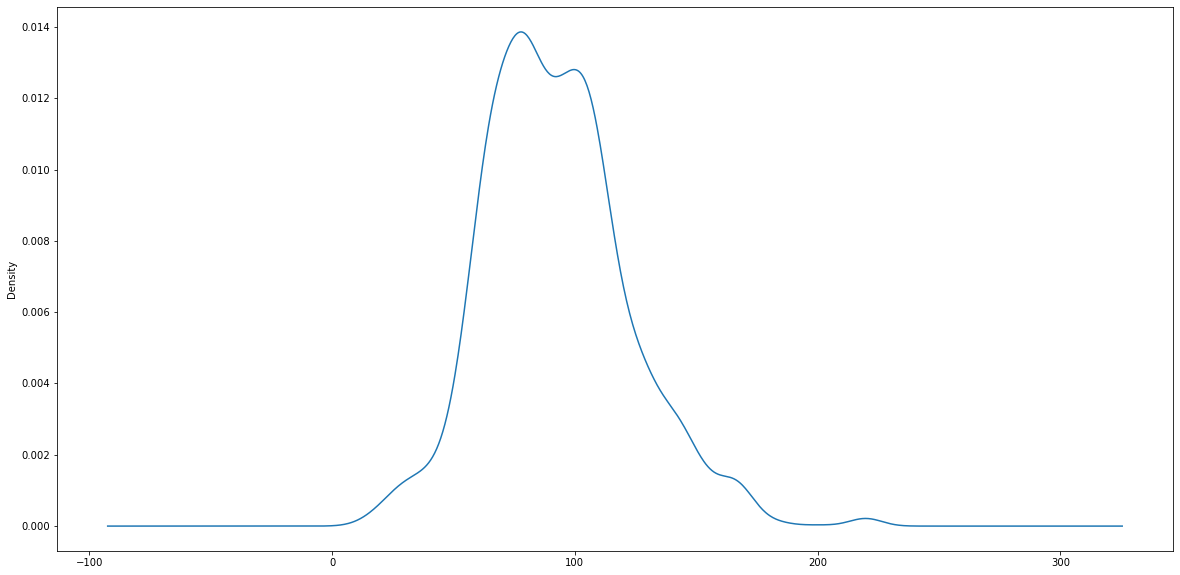

In [55]:
pd.Series(width).plot.kde()

In [63]:
pd.Series(width).quantile(0.25)

71.0

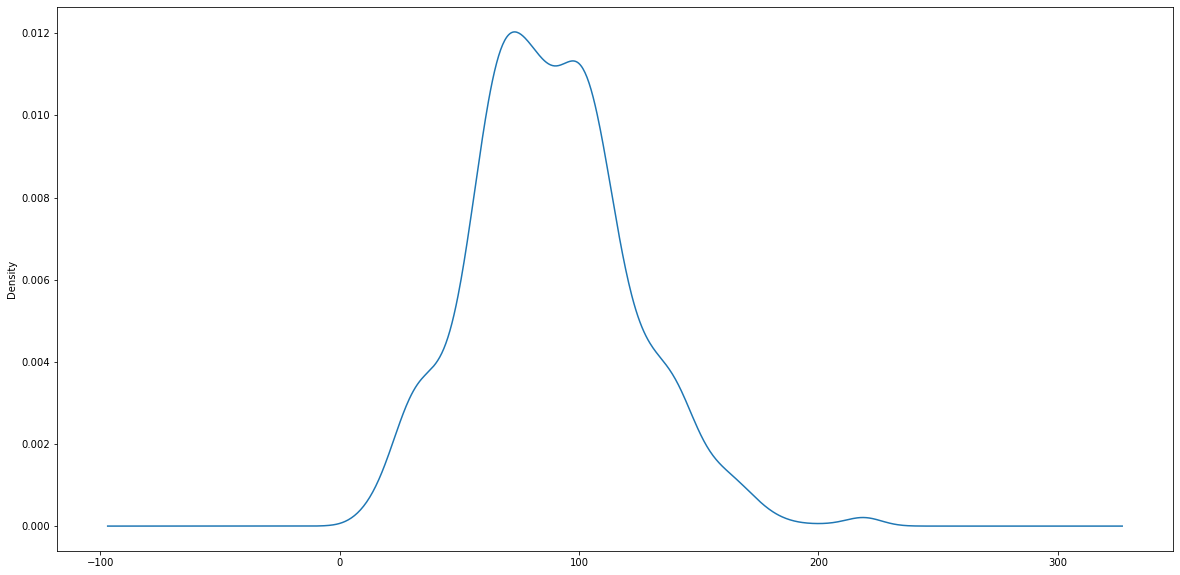

In [56]:
pd.Series(height).plot.kde()

In [64]:
pd.Series(height).quantile(0.25)

66.0

In [57]:
np.mean(width)

92.38108108108108

In [60]:
np.mean(height)

88.31261261261261

In [43]:
train_val_labels

,filename,center_x,center_y,size,label
0,571.jpeg,1746,691,138,1
1,387.jpeg,1132,649,100,0
2,813.jpeg,166,642,108,0
3,1351.jpeg,1693,753,104,1
4,1367.jpeg,1320,647,112,1
...,...,...,...,...,...
2451,379.jpeg,634,697,130,0
2452,648.jpeg,508,633,102,1
2453,1700.jpeg,534,636,64,0
2454,691.jpeg,937,685,150,0


In [44]:
for i in range(len(bad_photos)):
    bad_photos[i] = str(bad_photos[i]) + '.jpeg'

In [45]:
to_drop = []
for i in tqdm(range(len(train_val_labels))):
    if(train_val_labels.iloc[i, 0] in bad_photos):
        to_drop.append(i)
assert len(to_drop) == len(bad_photos)

In [46]:
train_val_labels.drop(to_drop, inplace=True)

In [47]:
train_val_labels[['filename', 'label']].to_csv('./train_prepared/train.csv')

In [48]:
path = './test'
num_files = sum(os.path.isfile(os.path.join(path, f)) for f in os.listdir(path))
print(num_files)
good_photos = 0
for num_file in tqdm(range(num_files)):
    img = cv2.imread('./test/' + str(num_file) + '.jpeg', 0)
    img_rgb = cv2.cvtColor(cv2.imread('./test/' + str(num_file) + '.jpeg'), cv2.COLOR_BGR2RGB)
    edges = cv2.Canny(img, 80, 200)
    if((edges == 0).sum() != edges.size):
        good_photos += 1
        new_photo_predicted = create_slice(img_rgb, np.nonzero(edges)[0].min(), np.nonzero(edges)[0].max(), np.nonzero(edges)[1].min(), np.nonzero(edges)[1].max())
        Image.fromarray(new_photo_predicted).save('./test_prepared/' + str(num_file) + '.jpeg')

2984


In [49]:
print('Успешно обработано: ', round(good_photos * 100 / num_files, 2), ' %')

Успешно обработано:  96.41  %
